## Pyber Ride Sharing Data analysis and Visualization

Observations: Market Forces in play.
Rural Areas had fewer riders as well as fewer drivers. This may be a reason for the higher rates there.
Urban areas had the highest riders and driver count, possible leading to lower ride rates.
Suburban areas were noted to be in the middle for driver & rider count.
Simple market forces of demand and supply appear to influence the rates as well as driver count.

In [18]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
# import files (using pandas)

city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)


#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')

In [20]:
#Check
#merged_df.head()

In [21]:
#color scheme dictionary and preview
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
#sns.palplot(sns.color_palette(colors.values()))
#plt.show()

##  Ride Sharing Data - Bubble Plot View

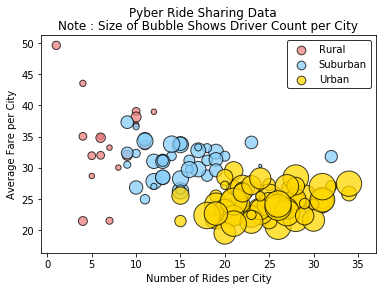

In [22]:
#group by city name
by_city = merged_df.groupby('city')

# var for avg fare by city
avg_fare = by_city.mean()['fare']

#var for rides by city
ride_count = by_city['ride_id'].count()

# Count of drivers
driver_count = by_city.mean()['driver_count']

# city type
city_type = city_df.set_index('city')['type']

# Create dataframe
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

# Dataframes for city types
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary 
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note : Size of Bubble Shows Driver Count per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

## Total Fares - City Type

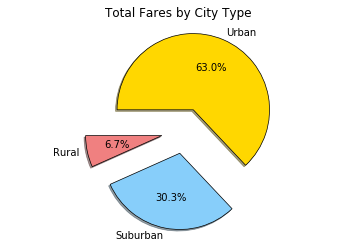

In [23]:
#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0.3 , 0.3, .3]
plt.pie(fare_sum, startangle = 180, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})

#pie chart display
plt.title('Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides - City Type 

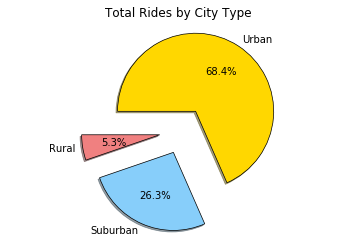

In [24]:
# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})
plt.title('Total Rides by City Type')
plt.axis('equal')
plt.show()

## Drivers by City Type 

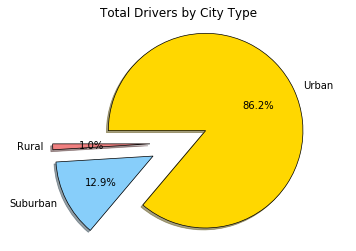

In [25]:
# of driver per city type
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})
plt.title('Total Drivers by City Type')
plt.axis('equal')
plt.show()